<a href="https://colab.research.google.com/github/Umeshika97/Breast-Cancer-Detection-Using-Machine-Learning-Random-Forest-/blob/main/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About the dataset

Nursery Database was derived from a hierarchical decision model originally developed to rank applications for nursery schools. It was used during several years in 1980's when there was excessive enrollment to these schools in **Ljubljana, Slovenia**, and the rejected applications frequently needed an objective explanation. The final decision depended on three subproblems: occupation of parents and child's nursery, family structure and financial standing, and social and health picture of the family. 

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
import pandas as pd
# reading csv files
df =  pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', sep="," , names=["parents", "has_nurs", "form", "children" , "housing" , "finance" , "social" , "health" ,"rec_status"])
print(df.head())

  parents has_nurs      form  ...         social       health rec_status
0   usual   proper  complete  ...        nonprob  recommended  recommend
1   usual   proper  complete  ...        nonprob     priority   priority
2   usual   proper  complete  ...        nonprob    not_recom  not_recom
3   usual   proper  complete  ...  slightly_prob  recommended  recommend
4   usual   proper  complete  ...  slightly_prob     priority   priority

[5 rows x 9 columns]


In [ ]:
df.describe()
#df.head()

,parents,has_nurs,form,children,housing,finance,social,health,rec_status
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,great_pret,very_crit,complete,more,convenient,inconv,slightly_prob,not_recom,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [ ]:
#view statistical properties
# df.describe().T
df.isnull().sum() #Checking for any missing values in the dataset

parents       0
has_nurs      0
form          0
children      0
housing       0
finance       0
social        0
health        0
rec_status    0
dtype: int64

In [ ]:
#checking the column names
df.columns

Index(['parents', 'has_nurs', 'form', 'children', 'housing', 'finance',
       'social', 'health', 'rec_status'],
      dtype='object')

In [ ]:
#drop useless data
df=df.drop(['has_nurs','housing','social' , "health" , 'children'], axis=1)
df.head()   

,parents,form,finance,rec_status
0,usual,complete,convenient,recommend
1,usual,complete,convenient,priority
2,usual,complete,convenient,not_recom
3,usual,complete,convenient,recommend
4,usual,complete,convenient,priority


In [ ]:
#view categorical varibales
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].head()

,parents,form,finance,rec_status
0,usual,complete,convenient,recommend
1,usual,complete,convenient,priority
2,usual,complete,convenient,not_recom
3,usual,complete,convenient,recommend
4,usual,complete,convenient,priority


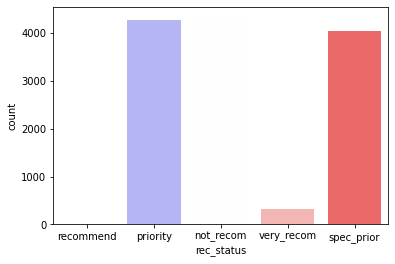

In [ ]:
#Some basic EDA if needed
df.rec_status.value_counts()
sns.countplot(x="rec_status", data=df, palette="bwr")
plt.show()

In [ ]:
#df.groupby('rec_status').mean() #If there are any numerical categories to analyse (there are none)

In [ ]:
# creating dummy values parents form and finance
parents=pd.get_dummies(df['parents'])
form=pd.get_dummies(df['form'])
finance=pd.get_dummies(df['finance'])

In [ ]:
df=pd.concat([df,parents,form , finance],axis=1) #Adding dummy to the original df and remving the original columns
df = df.drop(columns = ['parents', 'form' , 'finance'])
df.head()

,rec_status,great_pret,pretentious,usual,complete,completed,foster,incomplete,convenient,inconv
0,recommend,0,0,1,1,0,0,0,1,0
1,priority,0,0,1,1,0,0,0,1,0
2,not_recom,0,0,1,1,0,0,0,1,0
3,recommend,0,0,1,1,0,0,0,1,0
4,priority,0,0,1,1,0,0,0,1,0


In [ ]:
df.rec_status.unique() #Checking all the unique categories in the rec_status

array(['recommend', 'priority', 'not_recom', 'very_recom', 'spec_prior'],
      dtype=object)

In [ ]:
scale_mapper = {"not_recom":1, "recommend":2, "very_recom":3 , "priority":4 , "spec_prior":5}
df["rec_status_enc"] = df["rec_status"].replace(scale_mapper)

print(df.head())

  rec_status  great_pret  pretentious  ...  convenient  inconv  rec_status_enc
0  recommend           0            0  ...           1       0               2
1   priority           0            0  ...           1       0               4
2  not_recom           0            0  ...           1       0               1
3  recommend           0            0  ...           1       0               2
4   priority           0            0  ...           1       0               4

[5 rows x 11 columns]


In [ ]:
#Dropping the Rec_status variable since we have the encoded one
df=df.drop(["rec_status"], axis=1)
df.head()


,great_pret,pretentious,usual,complete,completed,foster,incomplete,convenient,inconv,rec_status_enc
0,0,0,1,1,0,0,0,1,0,2
1,0,0,1,1,0,0,0,1,0,4
2,0,0,1,1,0,0,0,1,0,1
3,0,0,1,1,0,0,0,1,0,2
4,0,0,1,1,0,0,0,1,0,4


In [ ]:
from sklearn.model_selection import train_test_split #Splitting data set to train and test the accuracy later
y = df.rec_status_enc.values
x_data = df.drop(['rec_status_enc'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.2,random_state=0)

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc.score(x_test, y_test)*100 ##Acuracy od Decision tree

41.358024691358025

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(x_test, y_test)*100 ##Acuracy of Random Forest

41.3966049382716

In [ ]:
#develop confusion matrix (For prediction)
y_dtc = dtc.predict(x_test)
y_rf = rf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_dtc = confusion_matrix(y_test,y_dtc)
cm_rf = confusion_matrix(y_test,y_rf)

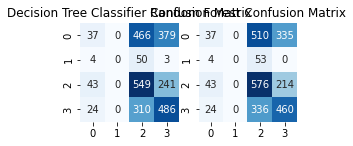

In [ ]:
plt.subplot(2,3,1)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,2)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.show() #This is not ideal in this case